In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

 # GEO DATA

In [53]:
geo_data = pd.read_csv('data/notebook/bronze_olist_geolocation_dataset.csv')

In [54]:
geo_data

,Unnamed: 0,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,0,1037,-23.5456,-46.6393,sao paulo,SP
1,1,1046,-23.5461,-46.6448,sao paulo,SP
2,2,1046,-23.5461,-46.6430,sao paulo,SP
3,3,1041,-23.5444,-46.6395,sao paulo,SP
4,4,1035,-23.5416,-46.6416,sao paulo,SP
...,...,...,...,...,...,...
1000158,1000158,99950,-28.0686,-52.0107,tapejara,RS
1000159,1000159,99900,-27.8771,-52.2249,getulio vargas,RS
1000160,1000160,99950,-28.0719,-52.0147,tapejara,RS
1000161,1000161,99980,-28.3889,-51.8469,david canabarro,RS


In [57]:
from mpl_toolkits.basemap import Basemap

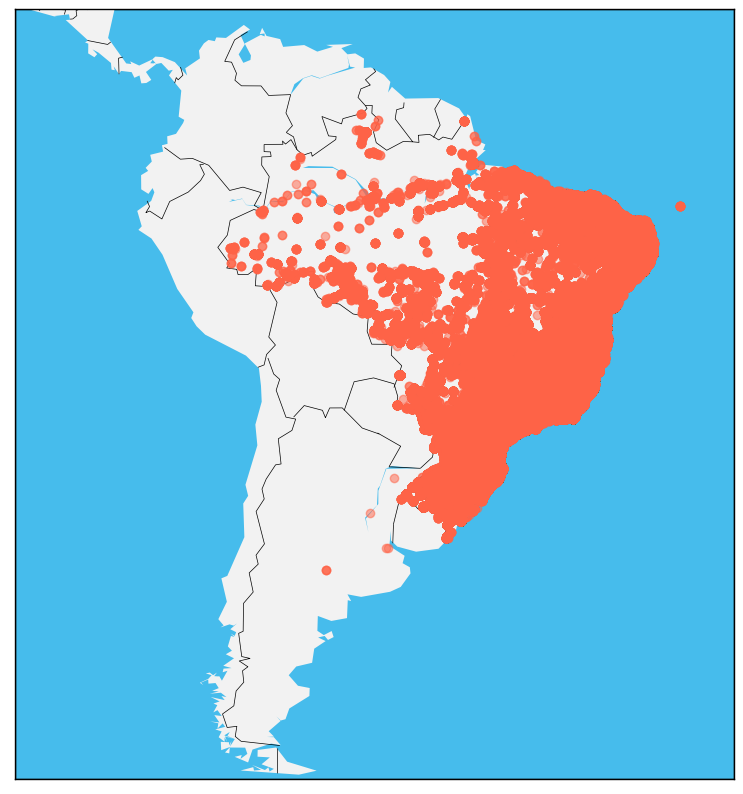

In [58]:
lat = geo_data['geolocation_lat']
lon = geo_data['geolocation_lng']

plt.figure(figsize=(10,10))

m = Basemap(llcrnrlat=-55.401805,llcrnrlon=-92.269176,urcrnrlat=13.884615,urcrnrlon=-27.581676)
m.bluemarble()
m.drawmapboundary(fill_color='#46bcec') 
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec') 
#m.drawcoastlines()
m.drawcountries()
m.scatter(lon, lat,zorder=10,alpha=0.5,color='tomato')

<AxesSubplot:xlabel='geolocation_state', ylabel='count'>

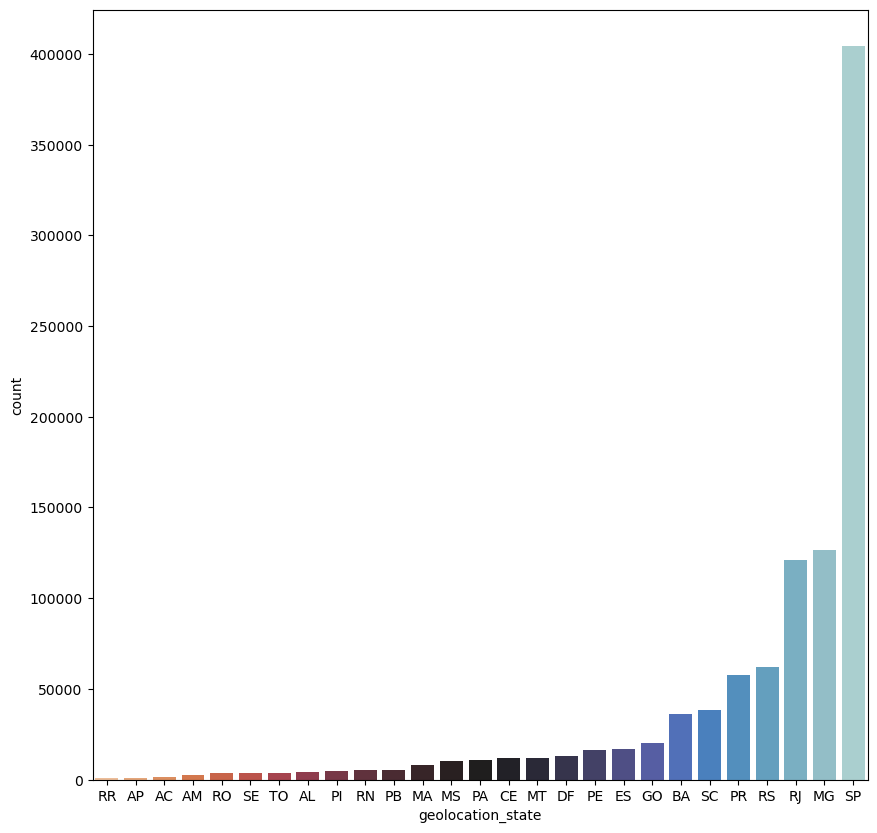

In [59]:
plt.figure(figsize=(10,10))
sns.countplot(x ='geolocation_state', data=geo_data, 
              order=geo_data['geolocation_state'].value_counts().sort_values().index, 
              palette='icefire_r')

# ORDERS INFORMATIONS

In [60]:
order_data = pd.read_csv('data/notebook/bronze_olist_orders_dataset.csv')

In [61]:
order_data.head()

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


In [62]:
order_data.isnull().sum()

Unnamed: 0                       0
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

 ## Time shipping 

In [63]:
# change dtype to datetime
order_data['delivered_time']=pd.to_datetime(order_data['order_delivered_customer_date'])
order_data['estimate_time']=pd.to_datetime(order_data['order_estimated_delivery_date'])

In [64]:
# weeks though the year contain days that customer order is delivered
order_data['weekly'] = pd.to_datetime(order_data['order_delivered_customer_date']).\
                            dt.isocalendar().week
order_data['weekly']

0        38
1        19
2         4
3        33
4         9
         ..
99436    19
99437    30
99438    43
99439    33
99440    24
Name: weekly, Length: 99441, dtype: UInt32

In [65]:
# month though the year contain days that customer order is delivered
order_data['yearly'] = pd.to_datetime(order_data['order_delivered_customer_date']).dt.to_period('M')
order_data['yearly']

0        2017-09
1        2017-05
2        2018-01
3        2018-08
4        2017-03
          ...   
99436    2018-05
99437    2018-07
99438    2017-10
99439    2017-08
99440    2018-06
Name: yearly, Length: 99441, dtype: period[M]

In [66]:
# change dtype to object
order_data['yearly']= order_data['yearly'].astype(str)

In [67]:
# interval of delivered time base on estimate time  
order_data['diff_days'] = order_data['estimate_time'] - order_data['delivered_time'] 
order_data['diff_days']

0        8 days 00:16:12
1        2 days 07:55:36
2       13 days 10:40:44
3        5 days 10:27:21
4       15 days 07:17:29
              ...       
99436    7 days 01:03:20
99437    8 days 03:28:05
99438   12 days 11:37:38
99439    8 days 02:00:20
99440   13 days 06:03:34
Name: diff_days, Length: 99441, dtype: timedelta64[ns]

In [68]:
# just take days value instead of full datetime value 
order_data['diff_days'] = order_data['diff_days'].dt.days
order_data['diff_days']

0         8
1         2
2        13
3         5
4        15
         ..
99436     7
99437     8
99438    12
99439     8
99440    13
Name: diff_days, Length: 99441, dtype: int64

Text(0.5, 1.0, "Average Difference Days Between 'estimated and realtime' delivery base on order information per Week")

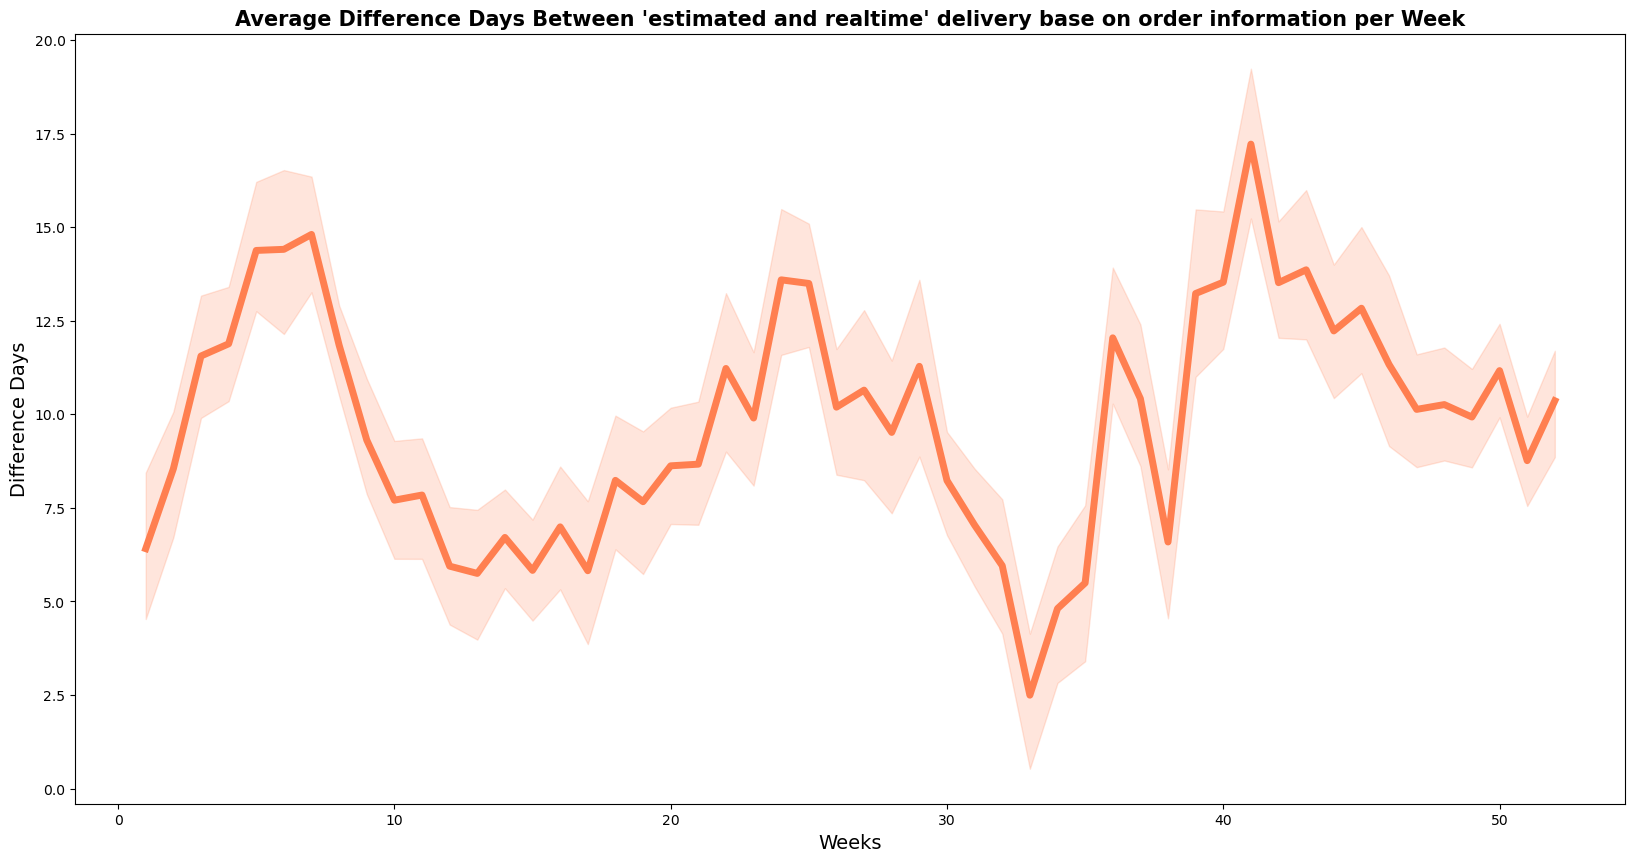

In [80]:
# difference of interval of delivered time base on estimated time though days per week (full weeks per year) 
plt.figure(figsize=(20,10))
sns.lineplot(x='weekly', y='diff_days', data=order_data, color="coral", linewidth=5,
            markers=True,dashes=False, estimator='mean')

plt.xlabel("Weeks", size=14)
plt.ylabel("Difference Days", size=14)
plt.title("Average Difference Days Between 'estimated and realtime' delivery base on order information per Week",size=15, weight='bold')

In [35]:
# Overview data
order_data.head()

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_time,estimate_time,weekly,yearly,diff_days
0,0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,2017-09-20 23:43:48,2017-09-29,38,2017-09,8
1,1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,2017-05-12 16:04:24,2017-05-15,19,2017-05,2
2,2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,2018-01-22 13:19:16,2018-02-05,4,2018-01,13
3,3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,2018-08-14 13:32:39,2018-08-20,33,2018-08,5
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,2017-03-01 16:42:31,2017-03-17,9,2017-03,15


# PRODUCT INFORMATIONS 

In [36]:
product_orders = pd.read_csv("data/notebook/dim_product_sales.csv")

In [37]:
product_orders.head()

,Unnamed: 0,product_id,product_category_name,order_id,order_item_id,seller_id,delivered_within_days,price,freight_value,payment_type,payment_value
0,0,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,6,6735.0,194.31,credit_card,6929.31
1,1,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,-5,6729.0,193.21,boleto,6922.21
2,2,1bdf5e6731585cf01aa8169c7028d6ad,artes,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,23,6499.0,227.66,boleto,6726.66
3,3,a6492cc69376c469ab6f61d8f44de961,eletroportateis,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,15,4799.0,151.34,credit_card,4950.34
4,4,c3ed642d592594bb648ff4a04cee2747,eletroportateis,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,8,4690.0,74.34,credit_card,4764.34


In [38]:
len(product_orders['product_id'].unique())

32951

In [39]:
len(product_orders['product_id'].str[-8:].unique())

32951

In [40]:
product_orders['product_id_shorten'] = product_orders['product_id'].str[-8:]

In [41]:
category_counts = product_orders['product_category_name'].value_counts()
category_counts.head(20)

cama_mesa_banho                11823
beleza_saude                    9972
esporte_lazer                   8945
moveis_decoracao                8744
informatica_acessorios          8082
utilidades_domesticas           7355
relogios_presentes              6201
telefonia                       4721
ferramentas_jardim              4574
automotivo                      4379
brinquedos                      4273
cool_stuff                      3987
perfumaria                      3560
bebes                           3196
eletronicos                     2845
papelaria                       2617
fashion_bolsas_e_acessorios     2151
pet_shop                        2028
moveis_escritorio               1778
unknown                         1698
Name: product_category_name, dtype: int64

In [42]:
product_orders.head()

,Unnamed: 0,product_id,product_category_name,order_id,order_item_id,seller_id,delivered_within_days,price,freight_value,payment_type,payment_value,product_id_shorten
0,0,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,6,6735.0,194.31,credit_card,6929.31,1d4cce7f
1,1,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,-5,6729.0,193.21,boleto,6922.21,cb6ed62e
2,2,1bdf5e6731585cf01aa8169c7028d6ad,artes,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,23,6499.0,227.66,boleto,6726.66,7028d6ad
3,3,a6492cc69376c469ab6f61d8f44de961,eletroportateis,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,15,4799.0,151.34,credit_card,4950.34,f44de961
4,4,c3ed642d592594bb648ff4a04cee2747,eletroportateis,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,8,4690.0,74.34,credit_card,4764.34,4cee2747


In [43]:
product_orders.groupby(["product_category_name"])["product_id_shorten"].count().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           11823
beleza_saude               9972
esporte_lazer              8945
moveis_decoracao           8744
informatica_acessorios     8082
utilidades_domesticas      7355
relogios_presentes         6201
telefonia                  4721
ferramentas_jardim         4574
automotivo                 4379
Name: product_id_shorten, dtype: int64

In [44]:
group_category= product_orders.groupby(['product_id_shorten','product_category_name',])['product_id_shorten']\
                                        .count().sort_values(ascending=False).head(10)

In [45]:
group_category

product_id_shorten  product_category_name 
314663af            moveis_decoracao          536
339b6058            cama_mesa_banho           525
70e7f83d            ferramentas_jardim        505
499d9c6b            ferramentas_jardim        406
97a372db            ferramentas_jardim        395
f1519f73            ferramentas_jardim        389
c61f2ac4            informatica_acessorios    357
d6772e08            relogios_presentes        327
2e5804a6            beleza_saude              283
c1e95ad7            informatica_acessorios    278
Name: product_id_shorten, dtype: int64

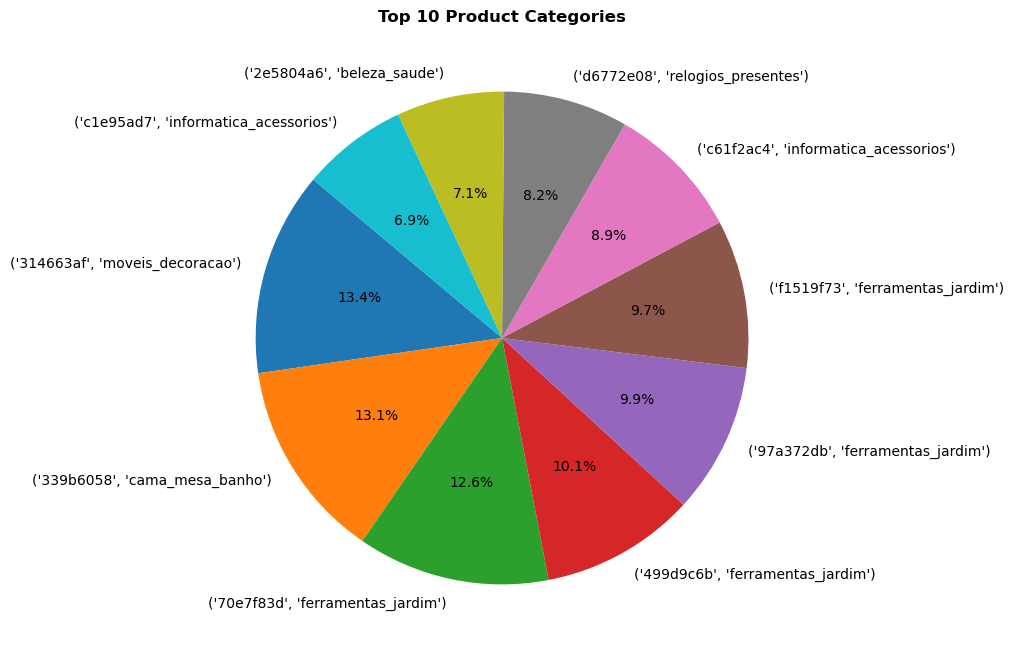

In [88]:
labels = group_category.index
sizes = group_category.values

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Product Categories', weight='bold')
plt.show()

In [70]:
delivery_time = pd.merge(product_orders, order_data, on="order_id").drop(columns=["customer_id",
                                                                                "order_delivered_customer_date",
                                                                                "order_estimated_delivery_date"])
delivery_time.head()

,Unnamed: 0_x,product_id,product_category_name,order_id,order_item_id,seller_id,delivered_within_days,price,freight_value,payment_type,...,Unnamed: 0_y,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,delivered_time,estimate_time,weekly,yearly,diff_days
0,0,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,6,6735.0,194.31,credit_card,...,3156,delivered,2017-02-12 20:37:36,2017-02-12 20:45:12,2017-02-16 09:23:13,2017-03-03 14:23:18,2017-03-09,9,2017-03,5
1,1,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,-5,6729.0,193.21,boleto,...,99072,delivered,2018-07-25 18:10:17,2018-07-27 04:05:13,2018-08-03 14:42:00,2018-08-15 14:57:50,2018-08-10,33,2018-08,-6
2,2,1bdf5e6731585cf01aa8169c7028d6ad,artes,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,23,6499.0,227.66,boleto,...,95187,delivered,2017-05-24 18:14:34,2017-05-26 02:45:17,2017-05-26 11:20:47,2017-06-05 17:09:48,2017-06-28,23,2017-06,22
3,3,a6492cc69376c469ab6f61d8f44de961,eletroportateis,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,15,4799.0,151.34,credit_card,...,65576,delivered,2017-04-01 15:58:40,2017-04-03 13:25:18,2017-04-11 15:10:34,2017-04-17 11:04:45,2017-05-02,16,2017-04,14
4,4,c3ed642d592594bb648ff4a04cee2747,eletroportateis,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,8,4690.0,74.34,credit_card,...,9941,delivered,2017-04-18 18:50:13,2017-04-19 15:50:15,2017-04-25 13:39:59,2017-05-07 10:42:39,2017-05-15,18,2017-05,7


Text(0.5, 1.0, "Average Difference Days Between 'estimated and real time' delivery base on product sold per Week")

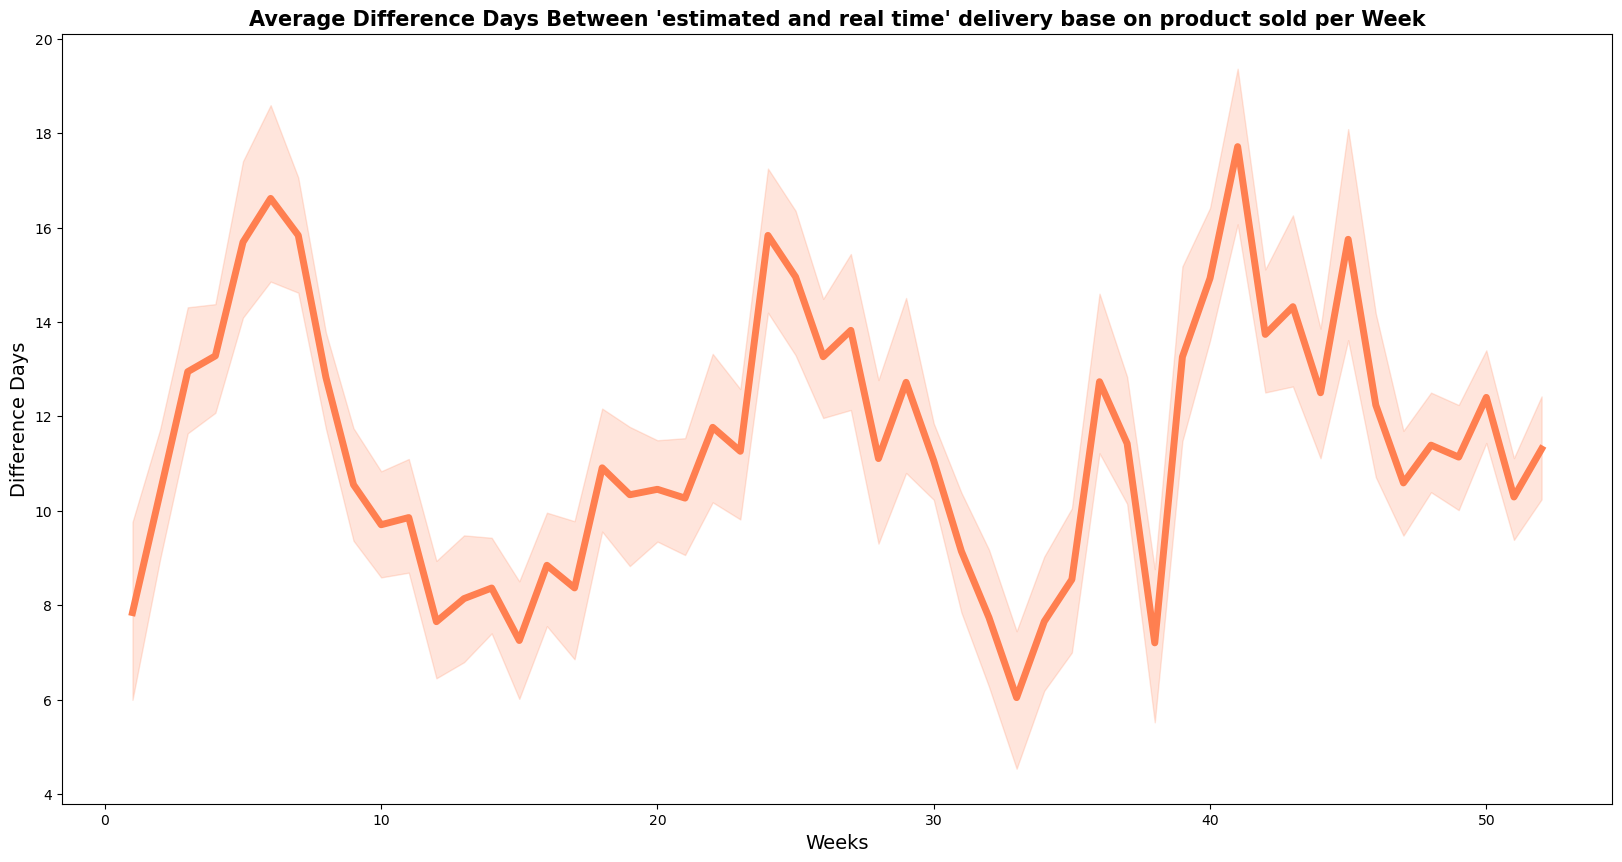

In [79]:
# difference of interval of delivered time base on estimated time though days per week (full weeks per year) 
plt.figure(figsize=(20,10))
sns.lineplot(x='weekly', y='delivered_within_days', data=delivery_time, color="coral", linewidth=5,
            markers=True,dashes=False, estimator='mean')

plt.xlabel("Weeks", size=14)
plt.ylabel("Difference Days", size=14)
plt.title("Average Difference Days Between 'estimated and real time' delivery base on product sold per Week",size=15, weight='bold')

# SELLER INFORMATIONS

In [149]:
sellers_data = pd.read_csv('data/notebook/bronze_olist_sellers_dataset.csv')
sellers_data.head()

,Unnamed: 0,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,0,0015a82c2db000af6aaaf3ae2ecb0532,9080,santo andre,SP
1,1,001cca7ae9ae17fb1caed9dfb1094831,29156,cariacica,ES
2,2,001e6ad469a905060d959994f1b41e4f,24754,sao goncalo,RJ
3,3,002100f778ceb8431b7a1020ff7ab48f,14405,franca,SP
4,4,003554e2dce176b5555353e4f3555ac8,74565,goiania,GO


In [150]:
seller_products = pd.merge(product_orders, sellers_data, on="seller_id")
seller_products.head()

,Unnamed: 0_x,product_id,product_category_name,order_id,order_item_id,seller_id,delivered_within_days,price,freight_value,payment_type,payment_value,product_id_shorten,Unnamed: 0_y,seller_zip_code_prefix,seller_city,seller_state
0,0,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,6,6735.0,194.31,credit_card,6929.31,1d4cce7f,2736,3635,sao paulo,SP
1,29976,4bf205e4dc4e2c6b258e1ec0e2be9367,cool_stuff,b017dafe7c59c8aaf92ab3fa1ca54d78,1,e3b4998c7a498169dc7bce44e6bb6277,-342,130.0,11.52,credit_card,141.52,e2be9367,2736,3635,sao paulo,SP
2,95273,679804d4938f8bf53025298b725f2eb6,market_place,5de59551c282b892ae9ff238fd557145,1,e3b4998c7a498169dc7bce44e6bb6277,-199,32.9,10.96,credit_card,43.86,725f2eb6,2736,3635,sao paulo,SP
3,1,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,-5,6729.0,193.21,boleto,6922.21,cb6ed62e,1583,86026,londrina,PR
4,2,1bdf5e6731585cf01aa8169c7028d6ad,artes,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,23,6499.0,227.66,boleto,6726.66,7028d6ad,2881,74210,goiania,GO


In [151]:
len(seller_products['seller_id'].unique())

3095

In [152]:
len(seller_products['seller_id'].str[-6:].unique())

3095

In [153]:
seller_products['seller_id_shorten']=seller_products['seller_id'].str[-6:]

In [154]:
seller_products

,Unnamed: 0_x,product_id,product_category_name,order_id,order_item_id,seller_id,delivered_within_days,price,freight_value,payment_type,payment_value,product_id_shorten,Unnamed: 0_y,seller_zip_code_prefix,seller_city,seller_state,seller_id_shorten
0,0,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,6,6735.0,194.31,credit_card,6929.31,1d4cce7f,2736,3635,sao paulo,SP,bb6277
1,29976,4bf205e4dc4e2c6b258e1ec0e2be9367,cool_stuff,b017dafe7c59c8aaf92ab3fa1ca54d78,1,e3b4998c7a498169dc7bce44e6bb6277,-342,130.0,11.52,credit_card,141.52,e2be9367,2736,3635,sao paulo,SP,bb6277
2,95273,679804d4938f8bf53025298b725f2eb6,market_place,5de59551c282b892ae9ff238fd557145,1,e3b4998c7a498169dc7bce44e6bb6277,-199,32.9,10.96,credit_card,43.86,725f2eb6,2736,3635,sao paulo,SP,bb6277
3,1,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,-5,6729.0,193.21,boleto,6922.21,cb6ed62e,1583,86026,londrina,PR,74a1e2
4,2,1bdf5e6731585cf01aa8169c7028d6ad,artes,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,23,6499.0,227.66,boleto,6726.66,7028d6ad,2881,74210,goiania,GO,4eb391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,117282,0294e314a033317e28ecc40aee9025e8,pet_shop,357769c200aa5a3a9b859db2f47b9b65,3,6c9875b2f94ba781186f0c1aed8d1687,16,6.5,7.65,credit_card,106.69,ee9025e8,1325,17380,brotas,SP,8d1687
117597,117437,97c1215186cdbed36fc3bc4bb0ba938c,pet_shop,f64d7b26f80457f4d5de8ab2c5e6ecf5,1,6c9875b2f94ba781186f0c1aed8d1687,18,5.5,15.10,credit_card,20.60,b0ba938c,1325,17380,brotas,SP,8d1687
117598,117345,bd9729be9e09e2334d76a6648475d328,livros_interesse_geral,c7f2160ec04e1391b0c36a9414fbd118,1,3d62f86afa7c73be2628a3be1423f5a0,19,6.0,16.79,credit_card,22.79,8475d328,728,12327,jacarei,SP,23f5a0
117599,117349,bd9729be9e09e2334d76a6648475d328,livros_interesse_geral,a7be2467cdcb078b2ffdea6fd401952d,1,3d62f86afa7c73be2628a3be1423f5a0,23,6.0,25.63,credit_card,31.63,8475d328,728,12327,jacarei,SP,23f5a0


Text(0.5, 1.0, 'Top 10 Seller')

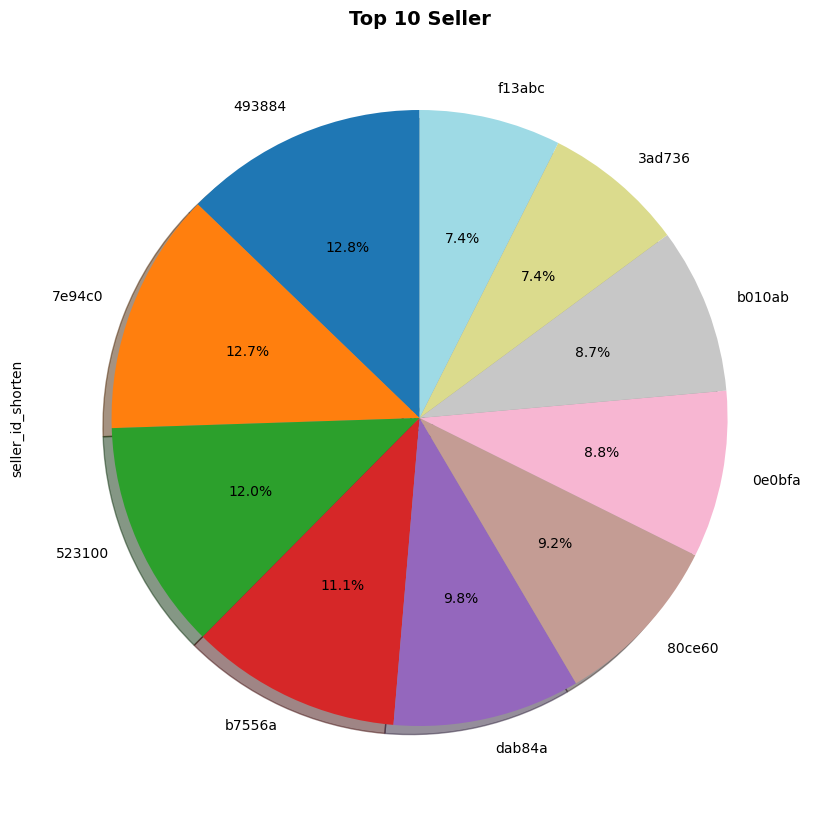

In [155]:
plt.figure(figsize=(20,10))
seller_products['seller_id_shorten'].value_counts()[:10].plot.pie(autopct='%1.1f%%', shadow=True, startangle=90, cmap='tab20')
plt.title("Top 10 Seller",size=14, weight='bold')

In [156]:
seller_category= seller_products.groupby(['seller_id_shorten', 'product_category_name'])\
                        ['seller_id_shorten'].count().sort_values(ascending=False).head(10)

In [157]:
seller_category

seller_id_shorten  product_category_name
523100             ferramentas_jardim       1954
7e94c0             relogios_presentes       1693
493884             cama_mesa_banho          1686
dab84a             cama_mesa_banho          1362
0e0bfa             moveis_decoracao         1324
b010ab             moveis_escritorio        1313
f13abc             telefonia                1214
3ad736             cool_stuff               1122
b7556a             beleza_saude             1108
3b52b2             relogios_presentes       1026
Name: seller_id_shorten, dtype: int64

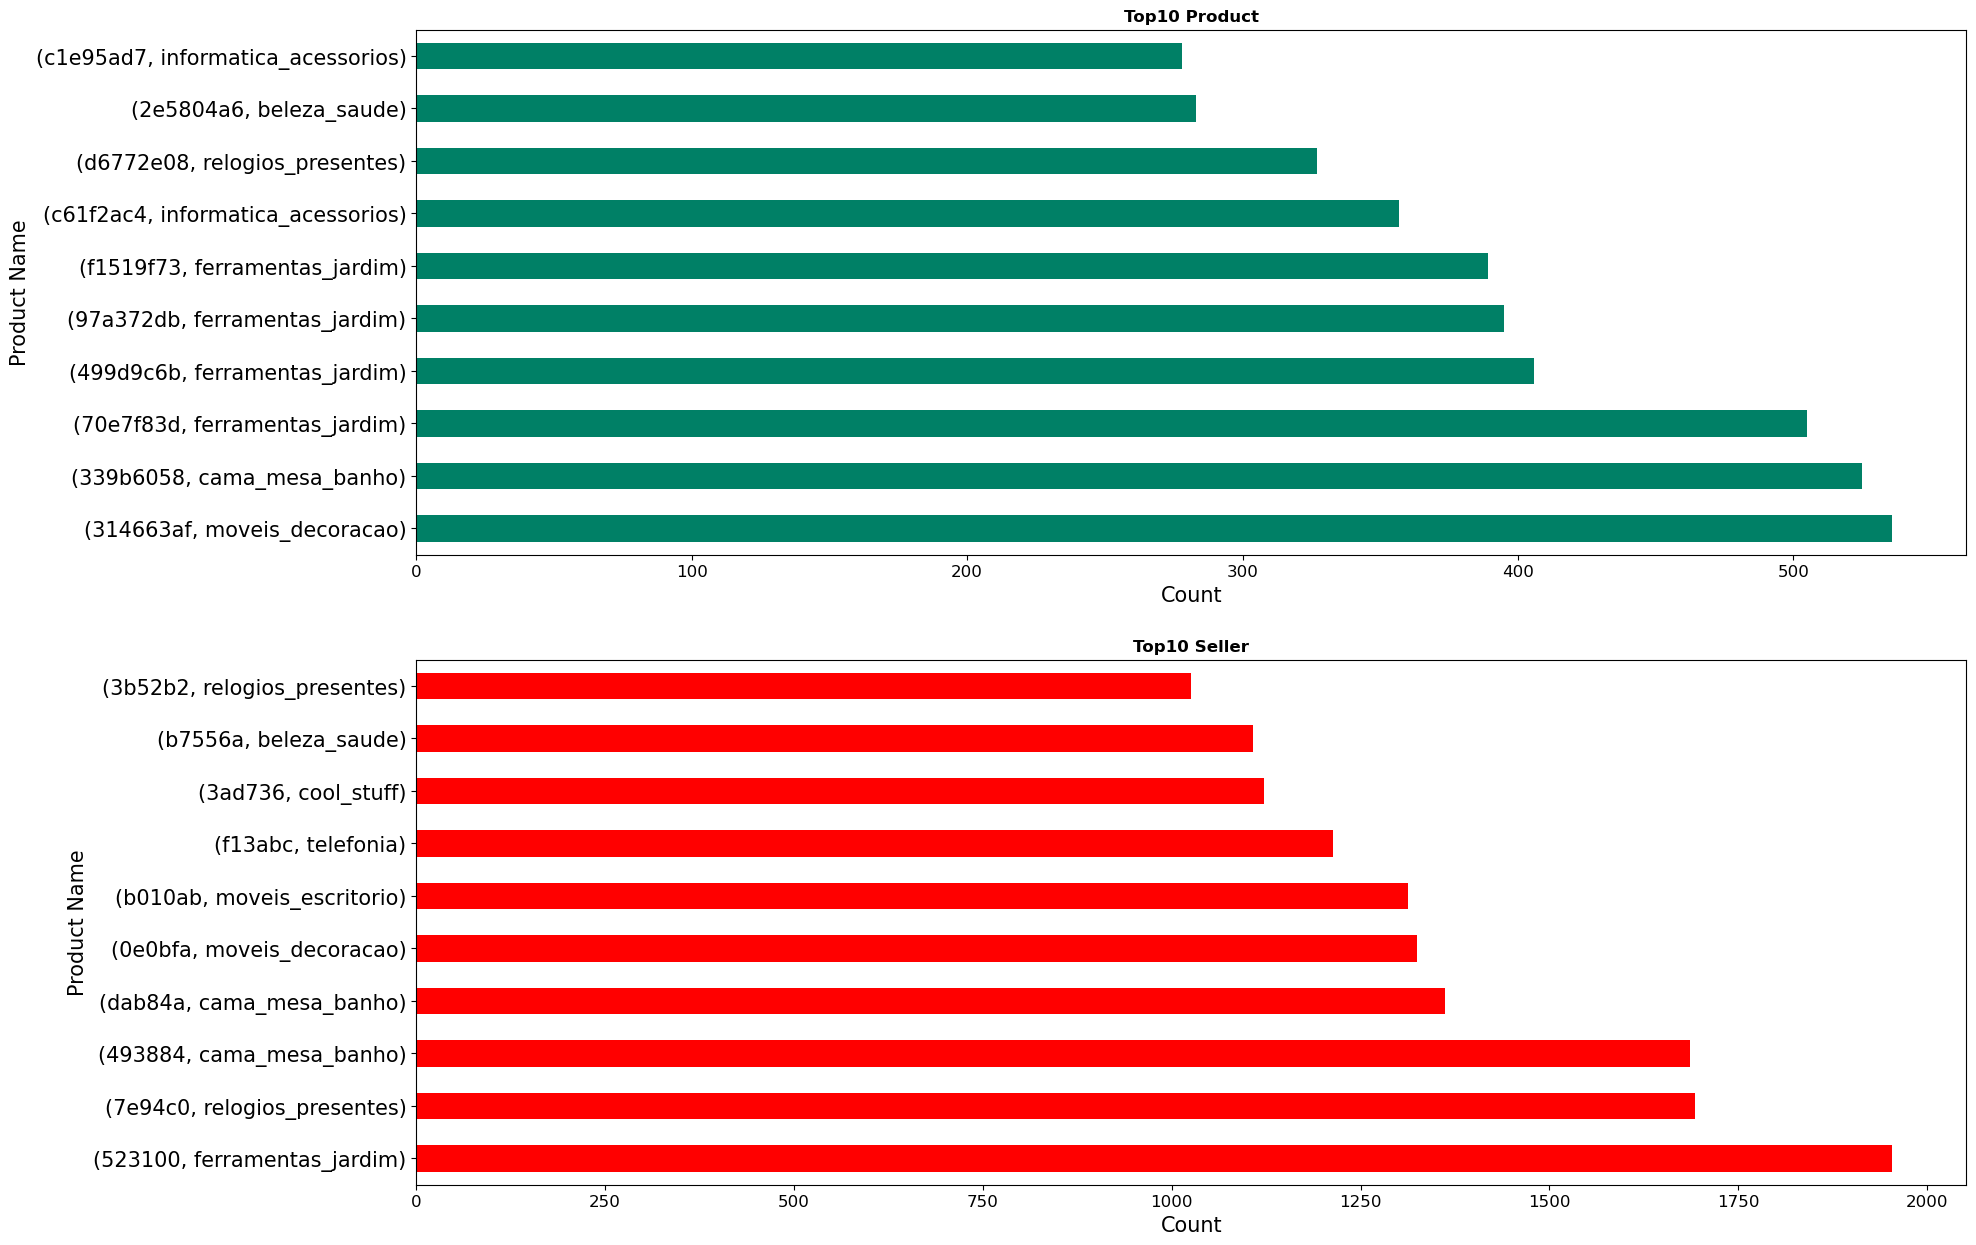

In [158]:
f, (ax1, ax2)= plt.subplots(2, 1, figsize=(20,15))
group_category.plot.barh(ax=ax1, cmap='summer')
seller_category.plot.barh(ax=ax2, cmap='autumn')

ax1.set_title('Top10 Product', fontweight='bold')
ax2.set_title('Top10 Seller', fontweight='bold')

ax1.set_xlabel('Count', fontsize=15)
ax1.set_ylabel('Product Name', fontsize=15)
ax1.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=15)

ax2.set_xlabel('Count', fontsize=15)
ax2.set_ylabel('Product Name', fontsize=15)
ax2.xaxis.set_tick_params(labelsize=12)
ax2.yaxis.set_tick_params(labelsize=15)

In [159]:
product_info = pd.merge(product_orders, order_data, on="order_id").drop(columns=["customer_id",
                                                                                "order_delivered_customer_date",
                                                                                "order_estimated_delivery_date"])
product_info.head()

,Unnamed: 0_x,product_id,product_category_name,order_id,order_item_id,seller_id,delivered_within_days,price,freight_value,payment_type,...,Unnamed: 0_y,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,delivered_time,estimate_time,weekly,yearly,diff_days
0,0,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,6,6735.0,194.31,credit_card,...,3156,delivered,2017-02-12 20:37:36,2017-02-12 20:45:12,2017-02-16 09:23:13,2017-03-03 14:23:18,2017-03-09,9,2017-03,5
1,1,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,-5,6729.0,193.21,boleto,...,99072,delivered,2018-07-25 18:10:17,2018-07-27 04:05:13,2018-08-03 14:42:00,2018-08-15 14:57:50,2018-08-10,33,2018-08,-6
2,2,1bdf5e6731585cf01aa8169c7028d6ad,artes,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,23,6499.0,227.66,boleto,...,95187,delivered,2017-05-24 18:14:34,2017-05-26 02:45:17,2017-05-26 11:20:47,2017-06-05 17:09:48,2017-06-28,23,2017-06,22
3,3,a6492cc69376c469ab6f61d8f44de961,eletroportateis,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,15,4799.0,151.34,credit_card,...,65576,delivered,2017-04-01 15:58:40,2017-04-03 13:25:18,2017-04-11 15:10:34,2017-04-17 11:04:45,2017-05-02,16,2017-04,14
4,4,c3ed642d592594bb648ff4a04cee2747,eletroportateis,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,8,4690.0,74.34,credit_card,...,9941,delivered,2017-04-18 18:50:13,2017-04-19 15:50:15,2017-04-25 13:39:59,2017-05-07 10:42:39,2017-05-15,18,2017-05,7


Text(0.5, 1.0, 'Weekly Purchased Number of `314663af` product')

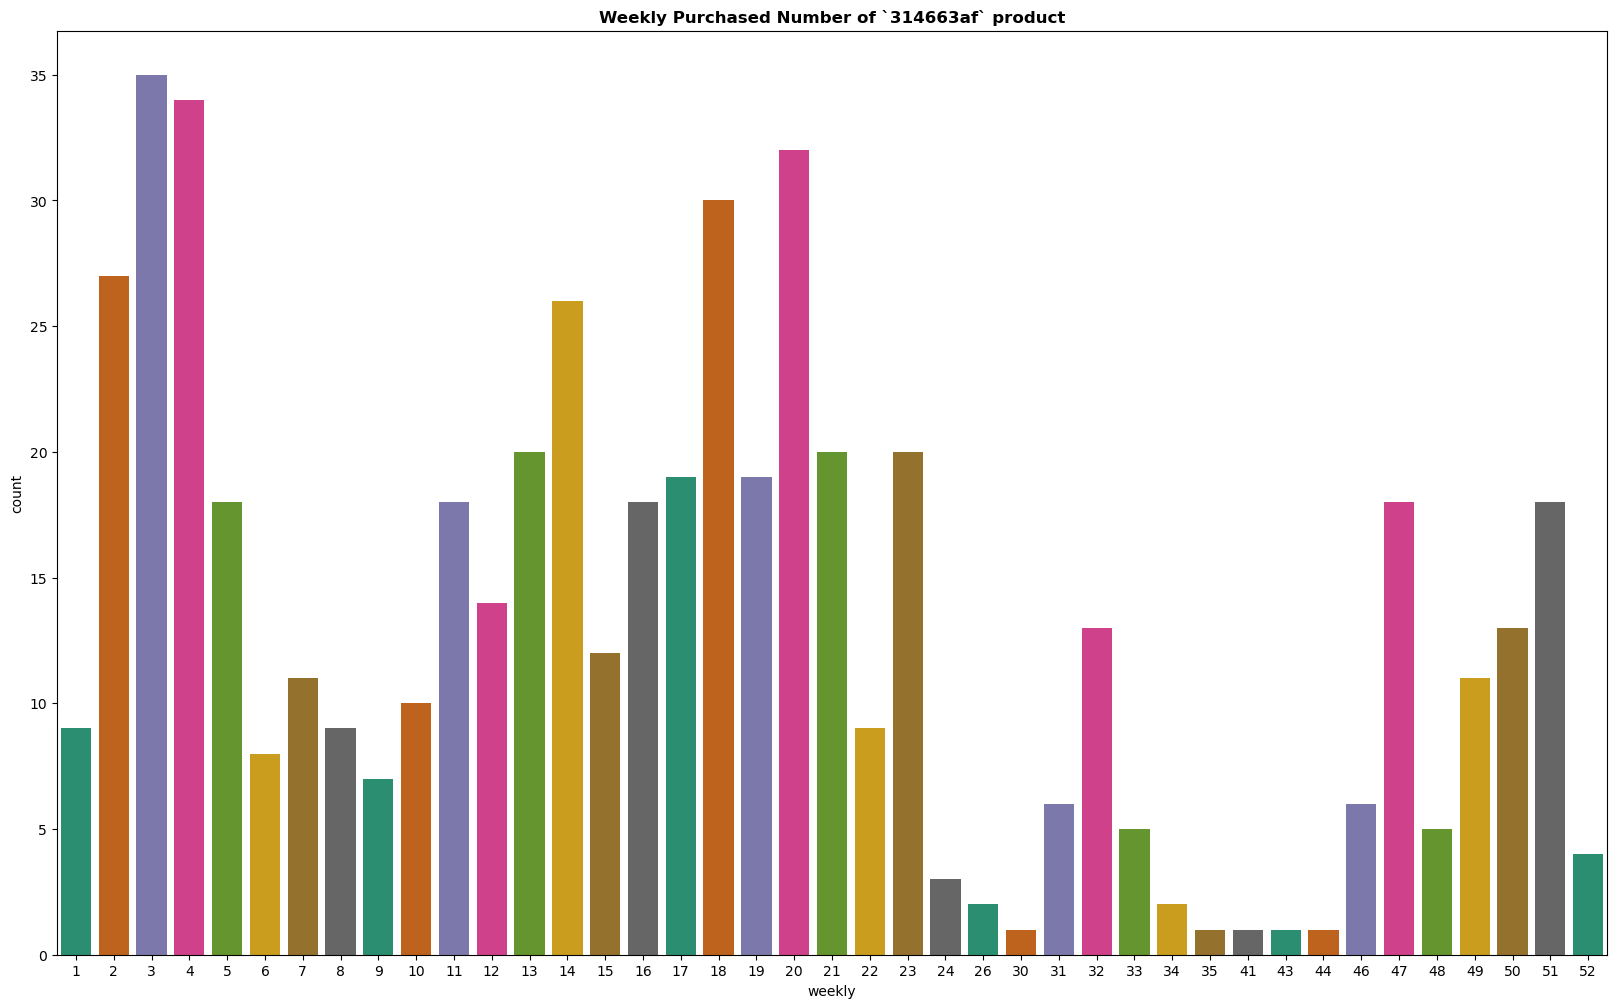

In [160]:
plt.figure(figsize= (20, 12))
sns.countplot(x= 'weekly',
              data= product_info[product_info['product_id_shorten'] == '314663af'], 
              palette= 'Dark2', linewidth= 5)\
    .set_title('Weekly Purchased Number of `314663af` product', fontweight= 'bold')

In [161]:
product_orders

,Unnamed: 0,product_id,product_category_name,order_id,order_item_id,seller_id,delivered_within_days,price,freight_value,payment_type,payment_value,product_id_shorten
0,0,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,6,6735.0,194.31,credit_card,6929.31,1d4cce7f
1,1,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,-5,6729.0,193.21,boleto,6922.21,cb6ed62e
2,2,1bdf5e6731585cf01aa8169c7028d6ad,artes,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,23,6499.0,227.66,boleto,6726.66,7028d6ad
3,3,a6492cc69376c469ab6f61d8f44de961,eletroportateis,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,15,4799.0,151.34,credit_card,4950.34,f44de961
4,4,c3ed642d592594bb648ff4a04cee2747,eletroportateis,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,8,4690.0,74.34,credit_card,4764.34,4cee2747
...,...,...,...,...,...,...,...,...,...,...,...,...
117596,117596,270516a3f41dc035aa87d220228f844c,beleza_saude,8272b63d03f5f79c56e9e4120aec44ef,17,2709af9587499e95e803a6498a5a56e9,-3,1.2,7.89,credit_card,196.11,228f844c
117597,117597,270516a3f41dc035aa87d220228f844c,beleza_saude,8272b63d03f5f79c56e9e4120aec44ef,20,2709af9587499e95e803a6498a5a56e9,-3,1.2,7.89,credit_card,196.11,228f844c
117598,117598,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,6e864b3f0ec71031117ad4cf46b7f2a1,1,96804ea39d96eb908e7c3afdb671bb9e,14,0.9,18.23,credit_card,19.08,9bc3c9be
117599,117599,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,18,0.9,22.30,boleto,54.20,9bc3c9be


In [206]:
# Weekly popular items 
items_weekly =product_info.groupby(['product_category_name', 'weekly', 'yearly'])\
                        ['product_category_name'].count().sort_values(ascending=False)
# Change to data frame
most_products= items_weekly.reset_index(name='count')

In [207]:
# Find the max value of rows
max_selling_products= most_products[most_products['count'] 
                            == most_products.groupby(['weekly','yearly'])\
                            ['count'].transform(max)]

In [208]:
max_selling_products.head(10)

,product_category_name,weekly,yearly,count
0,informatica_acessorios,10,2018-03,283
1,beleza_saude,19,2018-05,268
2,beleza_saude,25,2018-06,266
3,cama_mesa_banho,51,2017-12,263
5,informatica_acessorios,12,2018-03,260
6,beleza_saude,33,2018-08,260
7,informatica_acessorios,14,2018-04,255
8,beleza_saude,32,2018-08,254
9,beleza_saude,35,2018-08,253
10,beleza_saude,34,2018-08,251


# PAYMENTS INFORMATION

In [255]:
payment_data = pd.read_csv('data/notebook/bronze_olist_order_payments_dataset.csv')
payment_customers = pd.read_csv("data/notebook/fact_customers.csv")
sale_by_category = pd.read_csv('data/notebook/sale_value_by_category.csv')
sale_by_category['product_category_name'] = sale_by_category['category']
sale_by_category.drop(columns=['category'], inplace=True)

In [256]:
display(sale_by_category)
display(payment_customers)

,Unnamed: 0,monthly,total_sales,total_orders,value_per_order,product_category_name
0,0,2017-01,95.6,2.0,47.80,dvds_blu_ray
1,1,2017-02,5271.5,37.0,142.47,pet_shop
2,2,2017-10,314.6,5.0,62.93,dvds_blu_ray
3,3,2018-07,27871.1,140.0,199.08,pet_shop
4,4,2017-03,2028.8,5.0,405.76,dvds_blu_ray
...,...,...,...,...,...,...
128,128,2017-07,44961.6,225.0,199.83,cool_stuff
129,129,2018-02,13204.4,51.0,258.91,consoles_games
130,130,2018-08,34886.0,175.0,199.35,pet_shop
131,131,2017-06,1645.8,15.0,109.72,market_place


,Unnamed: 0,customer_id,num_of_orders,value_per_order,all_payment_value,order_status,payment_type,order_purchase_timestamp
0,0,08c5351a6aca1c1589a38f244edeee9d,1,136.23,136.23,shipped,credit_card,2016-09-04 21:15:19
1,1,683c54fc24d40ee9f8a6fc179fd9856c,1,75.06,75.06,canceled,credit_card,2016-09-05 00:15:34
2,2,622e13439d6b5a0b486c435618b2679e,1,40.95,40.95,canceled,credit_card,2016-09-13 15:24:19
3,3,b106b360fe2ef8849fbbd056f777b4d5,1,109.34,109.34,canceled,credit_card,2016-10-02 22:07:52
4,4,355077684019f7f60a031656bd7262b8,1,45.46,45.46,delivered,boleto,2016-10-03 09:44:50
...,...,...,...,...,...,...,...,...
103266,103266,2823ffda607a2316375088e0d00005ec,1,137.03,137.03,canceled,voucher,2018-09-29 09:13:03
103267,103267,bf6181a85bbb4115736c0a8db1a53be3,1,80.38,80.38,canceled,voucher,2018-10-01 15:30:09
103268,103268,4c2ec60c29d10c34bd49cb88aa85cfc4,1,197.55,197.55,canceled,voucher,2018-10-03 18:55:29
103269,103269,856336203359aa6a61bf3826f7d84c49,1,222.03,222.03,canceled,voucher,2018-10-16 20:16:02


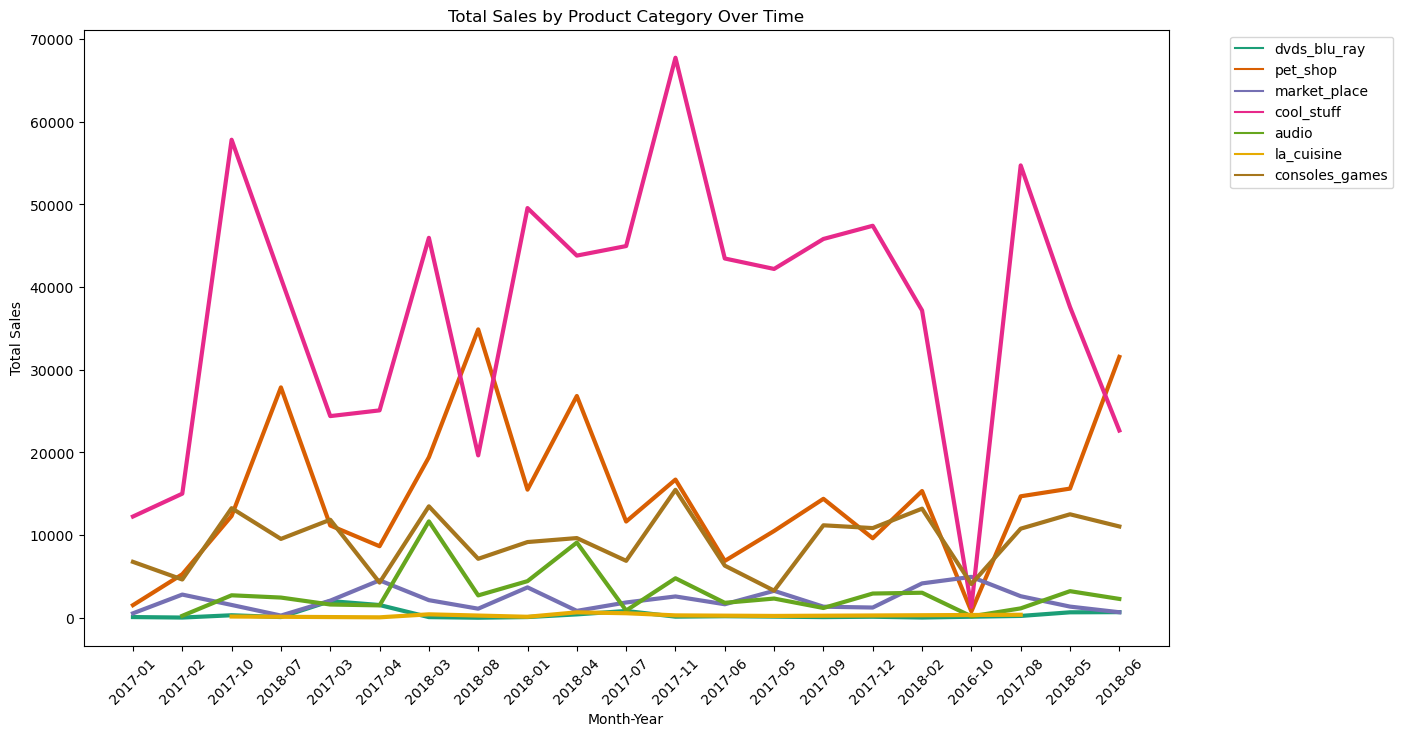

In [281]:
plt.figure(figsize=(14, 8))

custom_palette = sns.color_palette("Dark2", n_colors=len(sale_by_category['product_category_name'].unique()))

sns.lineplot(x='monthly', y='total_sales', hue='product_category_name', 
             data=sale_by_category, linewidth=3, palette=custom_palette,
            markers=True, dashes=False)
plt.title('Total Sales by Product Category Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

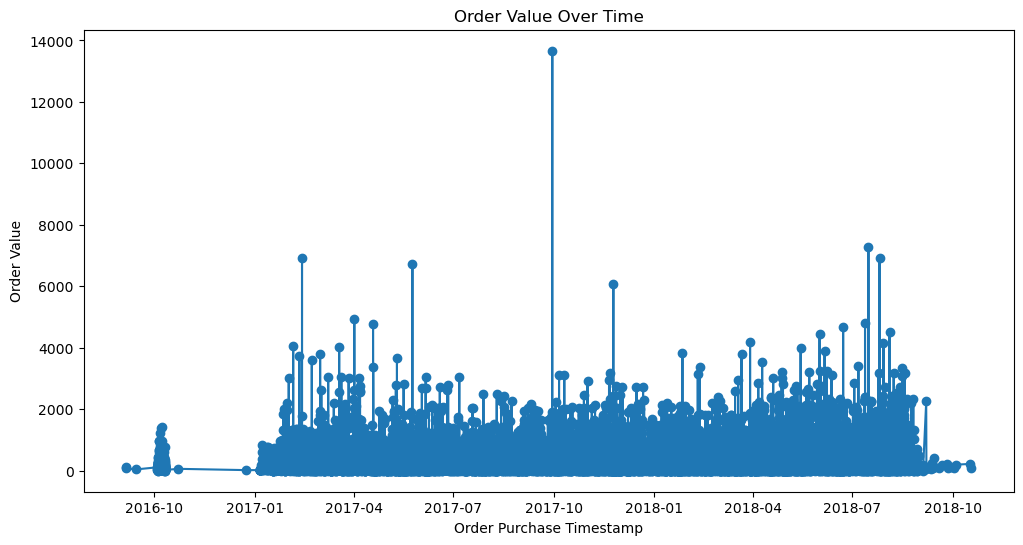

In [269]:
payment_customers['order_purchase_timestamp'] = pd.to_datetime(payment_customers['order_purchase_timestamp'])
plt.figure(figsize=(12, 6))
plt.plot(payment_customers['order_purchase_timestamp'], payment_customers['all_payment_value'], marker='o', linestyle='-')
plt.title('Order Value Over Time')
plt.xlabel('Order Purchase Timestamp')
plt.ylabel('Order Value')
plt.show()